    (1) 12쪽: [실습프로그램] 빠른정렬 프로그램을 다음의 내용을 포함하도록 python으로 완성하라. 문제의 크기, 즉 데이터의 개수를 n으로 표시한다. n=8,16,24,32,40 이 된다. 각 n에 대해서 다음을 구현한다. 정렬할 데이터를 20 set를 생성한다. 데이터는 0부터 n까지의 random number 정수로 구성되고, 중복이 허락된다. 20개의 데이터 set를 quick sort로 정렬할 때 평균 데이터 비교 횟수 (if (s[i]<pivotItem )를 구하라. 최종적으로 가로축에 n, 세로축에 평균 데이터 비교 횟수를 표시하는 그래프를 생성하여 그 점들을 이어주는 선을 관찰하라.
    
    (2) 17쪽: [실습프로그램] 쉬트라센 알고리즘을 python으로 완성하라. 여기서 threshold 를 2로 설정한다.
    
    n = [8, 16, 24, 32, 40]일 때, 각 n[i]의 빠른 정렬에서의 평균 데이터 비교 횟수는 [17.5, 29.06, 33.92, 40.62, 48.62]으로, n과 비례하게 결과가 나오는 것을 볼 수 있었습니다. 실제로 그래프를 생성하여 각 점들을 연결해본 결과, n과 평균 데이터 비교 횟수 선이 y = n과 유사하게 나왔으며, n이 증가함에 따라 비교 횟수 또한 증가함을 알 수 있었습니다. 이는 빠른 정렬의 시간복잡도가 O(n)인 것과 관련이 있습니다.

# Quick Sorting Algorithm

In [63]:
def quickSort(s, low, high) :
    
    if high > low : 
        result = partition(s, low, high)
        quickSort(s, low, result - 1)
        quickSort(s, result + 1, high)
        
def partition(s, low, high) :
    global sum
    
    pivotitem = s[low]
    j = low
    
    for i in range(low + 1, high + 1) :
        if s[i] < pivotitem :
            j += 1
            temp = s[i]
            s[i] = s[j]
            s[j] = temp
            
            sum += 1
            
    pivotpoint = j
        
    temp1 = s[low]
    s[low] = s[pivotpoint]
    s[pivotpoint] = temp1
    
    return j

In [64]:
import random

n = [8, 16, 24, 32, 40]
sum = 0

for i in range(5) :
    
    randomlist = []
    for j in range(n[i]):
        num = random.randint(0, n[i])
        randomlist.append(num)

    print("Case of n =", n[i])
    # print("before sorting : ", randomlist)
    quickSort(randomlist, 0, (n[i]-1))
    print("after sorting : ", randomlist)
    
    print()

Case of n = 8
after sorting :  [0, 2, 2, 3, 3, 4, 4, 8]

Case of n = 16
after sorting :  [0, 2, 2, 3, 5, 5, 8, 9, 10, 10, 12, 12, 14, 16, 16, 16]

Case of n = 24
after sorting :  [0, 2, 4, 4, 5, 6, 7, 8, 10, 11, 11, 11, 11, 11, 12, 13, 14, 14, 17, 17, 20, 20, 20, 24]

Case of n = 32
after sorting :  [0, 0, 2, 3, 6, 6, 6, 7, 8, 8, 8, 9, 10, 12, 12, 12, 14, 15, 15, 16, 16, 18, 19, 19, 22, 23, 25, 28, 28, 29, 30, 30]

Case of n = 40
after sorting :  [0, 2, 2, 3, 3, 4, 5, 6, 6, 9, 9, 9, 9, 9, 10, 10, 11, 12, 12, 12, 13, 16, 17, 18, 19, 19, 21, 22, 22, 23, 24, 24, 24, 28, 29, 30, 31, 32, 32, 39]



In [65]:
import random

n = [8,16,24,32,40]
final_list = []

for i in range(5) :
    total = 0
    
    for j in range(20) :
        sum = 0
    
        randomlist = []
        for j in range(n[i]):
            num = random.randint(0, n[i]) # n[0] 대신에 n[i]하고 전체적으로 for문 돌리기
            randomlist.append(num)

        quickSort(randomlist, 0, (n[i]-1))
    
        total += sum
        
    final = (round(total/n[i], 2))
        
    print ("total average number of comparion in Case of n =", n[i], ":", final)
    
    final_list.append(round(total/n[i], 2))

total average number of comparion in Case of n = 8 : 17.5
total average number of comparion in Case of n = 16 : 29.06
total average number of comparion in Case of n = 24 : 33.92
total average number of comparion in Case of n = 32 : 40.62
total average number of comparion in Case of n = 40 : 48.62


In [67]:
final_list

[17.5, 29.06, 33.92, 40.62, 48.62]

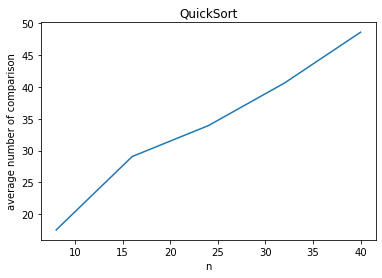

In [66]:
from matplotlib import pyplot as plt

plt.plot(n, final_list)

plt.xlabel('n')
plt.ylabel('average number of comparison')
plt.title('QuickSort')
plt.show()

In [51]:
practice = [4, 9, 2 ,10, 83, 1, 20, 7]

quickSort(practice, 0, 7)

print("after sorting : ", practice)

after sorting :  [1, 2, 4, 7, 9, 10, 20, 83]


# Strassen Algorithm

In [1]:
from numpy import *

In [41]:
def strassen(n, A, B, C) :
    
    new_range = int(n/2)
    
    thredshold = 2
    A11 = array([[0 for cols in range(new_range)] for rows in range(new_range)])
    A12 = array([[0 for cols in range(new_range)] for rows in range(new_range)])
    A21 = array([[0 for cols in range(new_range)] for rows in range(new_range)])
    A22 = array([[0 for cols in range(new_range)] for rows in range(new_range)])
    B11 = array([[0 for cols in range(new_range)] for rows in range(new_range)])
    B12 = array([[0 for cols in range(new_range)] for rows in range(new_range)])
    B21 = array([[0 for cols in range(new_range)] for rows in range(new_range)])
    B22 = array([[0 for cols in range(new_range)] for rows in range(new_range)])
    
    for i in range(0, new_range):
            for j in range(0, new_range):
                A11[i][j] = A[i][j] 
                A12[i][j] = A[i][j + new_range]
                A21[i][j] = A[i + new_range][j] 
                A22[i][j] = A[i + new_range][j + new_range] 
                B11[i][j] = B[i][j]
                B12[i][j] = B[i][j + new_range] 
                B21[i][j] = B[i + new_range][j] 
                B22[i][j] = B[i + new_range][j + new_range]  
    
    # print(A11, A12, A22, B11, B12, B21, B22)
    
    if (n <= thredshold) :
        C = array(A) @ array(B)
    else :
        M1 = M2 = M3 = M4 = M5 = M6 = M7 = array([])
        M1 = strassen(int(n/2), (A11 + A22), (B11 + B22), M1)
        M2 = strassen(int(n/2), (A21 + A22), B11, M2)
        M3 = strassen(int(n/2), A11, (B12 - B22), M3)
        M4 = strassen(int(n/2), A22, (B21 - B11), M4)
        M5 = strassen(int(n/2), (A11 + A12), B22, M5)
        M6 = strassen(int(n/2), (A21 - A11), (B11 + B12), M6)
        M7 = strassen(int(n/2), (A12 - A22), (B21 + B22), M7)
    
        C = vstack([hstack([M1 + M4 - M5 + M7, M3 + M5]), hstack([M2 + M4, M1 + M3 - M2 + M6])])

    return C

In [42]:
n = 4

# A = [[1 for cols in range(n)] for rows in range(n)]
# A = [[2 for cols in range(n)] for rows in range(n)]
A = [[1,2,0,2], [3,1,0,0], [0,1,1,2], [2,0,2,0]]
B = [[0,3,0,2], [1,1,4,0], [1,1,0,2], [0,5,2,0]]
C = array(A) @ array(B)

D = [[0 for cols in range(n)] for rows in range(n)]
print(C)

D = strassen(n, A, B, D)
print(D)

[[ 2 15 12  2]
 [ 1 10  4  6]
 [ 2 12  8  2]
 [ 2  8  0  8]]
[[ 2 15 12  2]
 [ 1 10  4  6]
 [ 2 12  8  2]
 [ 2  8  0  8]]


# practice

In [87]:
4/3

1.3333333333333333

In [131]:
def quickSort(s, low, high):
    
    pivotpoint = low

    if high > low :
        partition(s, low, high, pivotpoint)
        quickSort(s, low, pivotpoint - 1)
        quickSort(s, pivotpoint + 1, high)

def partition(s, low, high, pivotpoint):
    
    pivotitem = s[low]
    j = low

    for i in range(low + 1, high + 1):
        if s[i] < pivotitem:
            j += 1
            temp = s[i]
            s[i] = s[j]
            s[j] = temp

    pivotpoint = j
    temp = s[low] 
    s[low] = s[pivotpoint]
    s[pivotpoint] = temp

In [201]:
import random

n = [8, 16, 24, 32, 40]

for i in range(5) :
    sum = 0
    
    randomlist = []
    for j in range(20):
        num = random.randint(0, n[i]) # n[0] 대신에 n[i]하고 전체적으로 for문 돌리기
        randomlist.append(num)

    print("Case of n =", n[i])
    print("before sorting : ", randomlist)
    quickSort(randomlist, 0, 19)
    print("after sorting : ", randomlist)
    
    print()

Case of n = 8
before sorting :  [3, 5, 8, 6, 6, 7, 2, 8, 7, 4, 0, 6, 3, 6, 2, 1, 2, 8, 7, 1]
after sorting :  [1, 1, 0, 2, 2, 2, 3, 5, 6, 3, 4, 6, 6, 6, 7, 7, 7, 8, 8, 8]

Case of n = 16
before sorting :  [12, 14, 4, 9, 12, 1, 15, 1, 10, 1, 2, 9, 12, 13, 12, 14, 4, 7, 5, 10]
after sorting :  [10, 2, 1, 1, 1, 4, 5, 4, 7, 9, 9, 10, 12, 12, 12, 12, 13, 14, 14, 15]

Case of n = 24
before sorting :  [12, 15, 23, 12, 22, 18, 1, 3, 23, 18, 10, 9, 20, 12, 24, 17, 13, 16, 24, 17]
after sorting :  [9, 1, 3, 10, 12, 17, 13, 12, 12, 15, 16, 17, 18, 20, 18, 22, 23, 23, 24, 24]

Case of n = 32
before sorting :  [30, 15, 3, 27, 0, 30, 6, 20, 27, 18, 24, 25, 11, 20, 25, 21, 12, 10, 19, 8]
after sorting :  [8, 10, 0, 3, 6, 11, 12, 15, 18, 19, 20, 20, 21, 24, 25, 25, 27, 27, 30, 30]

Case of n = 40
before sorting :  [5, 30, 28, 29, 12, 20, 29, 17, 22, 12, 5, 25, 4, 15, 8, 0, 5, 16, 9, 3]
after sorting :  [3, 0, 4, 5, 9, 5, 5, 8, 12, 12, 16, 15, 17, 20, 22, 25, 28, 29, 29, 30]



In [9]:
def quickSort(s,low,high):
    pivotpoint=low
    if (high>low):
        partition(s,low,high)
        quickSort(s,low,pivotpoint-1)
        quickSort(s,pivotpoint+1,high)
        
def partition(s,low,high):
    pivotitem=s[low]
    i=low+1
    j=low
    while(i<=high):
        if (s[i]<pivotitem):
            j=j+1
            temp=s[i]
            s[i]=s[j]
            s[j]=temp

        i=i+1
    pivotpoint=j
    temp2=s[low]
    s[low]=s[pivotpoint]
    s[pivotpoint]=temp2
    return s

print("-----quickSort-----")
s=[3,5,2,9,10,14,4,8]
quickSort(s,0,7)
print(s)

-----quickSort-----
[2, 3, 4, 5, 8, 9, 10, 14]


In [12]:
import random

n = [8, 16, 24, 32, 40]

for i in range(5) :
    
    randomlist = []
    for j in range(n[i]):
        num = random.randint(0, n[i])
        randomlist.append(num)

    print("Case of n =", n[i])
    # print("before sorting : ", randomlist)
    quickSort(randomlist, 0, (n[i]-1))
    print("after sorting : ", randomlist)
    
    print()

Case of n = 8
after sorting :  [0, 0, 1, 2, 3, 6, 7, 7]

Case of n = 16
after sorting :  [1, 2, 2, 2, 3, 8, 8, 9, 13, 14, 14, 14, 15, 16, 16, 16]

Case of n = 24
after sorting :  [0, 0, 1, 2, 2, 3, 3, 4, 4, 4, 5, 5, 9, 9, 9, 12, 13, 15, 17, 18, 20, 21, 22, 24]

Case of n = 32
after sorting :  [0, 0, 2, 3, 4, 4, 5, 6, 8, 10, 11, 11, 11, 13, 13, 14, 14, 15, 16, 17, 18, 19, 19, 20, 21, 21, 23, 24, 25, 25, 27, 28]

Case of n = 40
after sorting :  [0, 0, 1, 2, 3, 4, 4, 5, 7, 7, 7, 9, 10, 10, 12, 13, 14, 15, 16, 16, 17, 17, 20, 21, 22, 28, 29, 29, 30, 31, 32, 32, 34, 35, 36, 36, 37, 37, 40, 40]



In [40]:
A = [[1,2,0,2], [3,1,0,0], [0,1,1,2], [2,0,2,0]]
A11 = array([[A[rows][cols] for cols in range(int(4/2))] for rows in range(int(4/2))])

print(A11)

[[1 2]
 [3 1]]


In [33]:
n = 4
A = [[1,2,0,2], [3,1,0,0], [0,1,1,2], [2,0,2,0]]
new_range = int(n/2)
A11 = array([[0 for cols in range(new_range)] for rows in range(new_range)])

print(A11)

[[0 0]
 [0 0]]
